<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-pnogueron/blob/main/Segundo%20curso%20IBM/Segundo_Curso_IBM_Modulo_5_Semana_8_A01097897.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>Data Analysis with Python - Segundo curso de IBM</H1>

Módulo 5 - Semana 8 </br>
Juan Pablo Noguerón Morales - A01097897</br>
Ciencia y analítica de datos


# Sección 1: Notebooks

In [109]:
#Importamos las librerías que estaremos usando
import requests
from io import BytesIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns 
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm

#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.pipeline import Pipeline


In [4]:
#Descarga del archivo Facebook Metrics
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
req = requests.get(url)
bt = BytesIO(req.content)

df = pd.read_csv(bt)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
#We're only going to work with numeric data
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [10]:
#Definimos funciones que nos ayudarán a graficar
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [11]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Training and testing

Separamos los datos entre training y testing

In [14]:
#Empezamos creadno un subset para tener únicamente el target (Precio de venta)
y_data = df['price']

In [13]:
#También creamos un dataframe que contiene únicamente las variables independientes
x_data = df.drop('price',axis=1)

In [16]:
#Ahora cremaos nuestros subsets de entrenamiento y testeo

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


<h3> Question 1 </h3>
Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1".


In [17]:
#Ahora cremaos nuestros subsets de entrenamiento y testeo

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.4, random_state = 0)


print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])


number of test samples : 81
number of training samples: 120


In [19]:
#Creamos un objeto linear regression
lre = LinearRegression()

In [20]:
#Y entrenamos usando unicamente la variable independiente horse-power
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [24]:
#Validamos el score con la data de entrenamiento
lre.score(x_train[['horsepower']], y_train)

#El score no es precisamente muy bueno. Esto nos habla un poco de underfit

0.6619724197515104

In [25]:
#Validamos el R2 score del conjunto de testeo
lre.score(x_test[['horsepower']], y_test)

#Se puede observar que el score es más bien bajo y aún más bajo que el de entrenamiento. 
#Al crecer la dispersión entre el score de entrenamiento vs el de testeo, nos indica que hay sobreentrenamiento


0.36358755750788263

<h3> Question 2 </h3>
Find the R^2  on the test data using 40% of the dataset for testing.

In [30]:
lre.fit(x_train1[['horsepower']], y_train1)

print('Score for train data: ', lre.score(x_train1[['horsepower']], y_train1))
print('Score for test data: ', lre.score(x_test1[['horsepower']], y_test1))

Score for train data:  0.5754067463583004
Score for test data:  0.7139364665406973


## Cross Validation Score

In [33]:
#Hacemos la validacion cruzada usando unicamente un modelo compuesto por la variable independiente horsepower
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 4)

In [34]:
#Observamos los scores de cada una de los 4 folds
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [38]:
#Calculamos el promedio y la desviación estandar
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [40]:
#Podemos definir que método de validación queremos usar con el parámetro scoring

-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv = 4, scoring = 'neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

<h3>Question 3</h3>
Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature 

In [44]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 2)
print("The mean of the folds are", Rcross.mean())
print("The mean of the seconf fold is", Rcross[1])

The mean of the folds are 0.5166761697127429
The mean of the seconf fold is 0.44319612775502903


También se puede usar la función cross_validate_predict

In [50]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv = 4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Overfitting, underfitting and Model selection

In [51]:
#Creamos el modelo multiple
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [52]:
#Havemos predicciones usando conjunto de entrenamiento
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [53]:
#Hacemos predicciones usando conjunto de validación
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


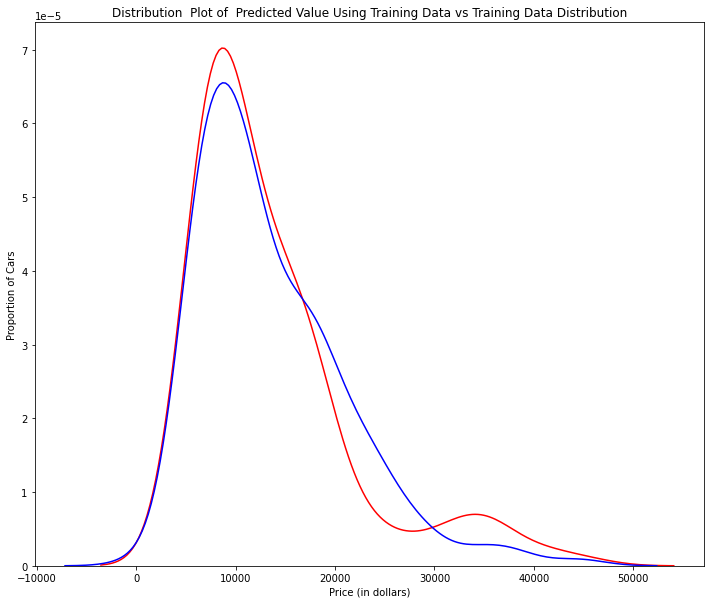

In [54]:
#Examinamos la los datos reales vs los predichos para el conjunto de entrenamiento
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


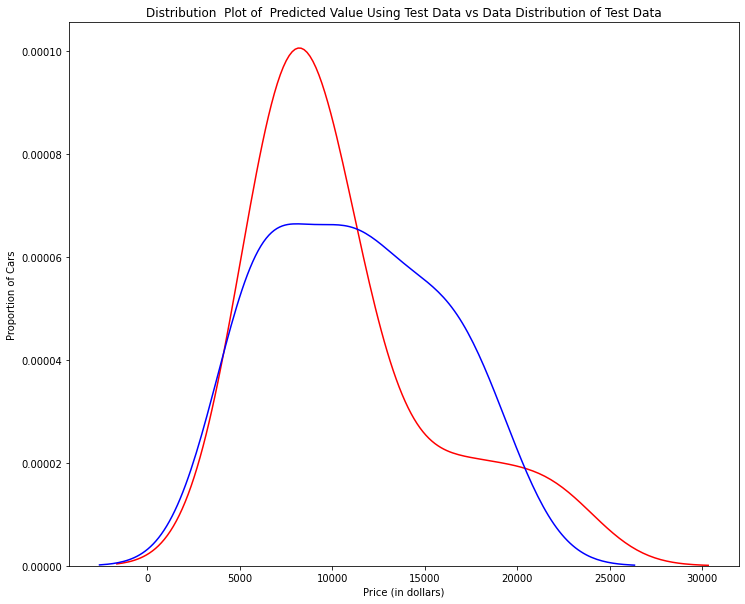

In [55]:
#Ahora observamos que pasó con nueva data
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [57]:
# Hacemos una particion con 45% de datos como test partition
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 0)

In [58]:
#Primero transformamos tanto el training como el testing en polinomios de grado 5
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [69]:
x_train[['horsepower']].head()

,horsepower
10,101.0
194,162.0
73,68.0
197,160.0
178,52.0


In [70]:
pd.DataFrame(x_train_pr).head()

,0,1,2,3,4,5
0,1.0,101.0,10201.0,1030301.0,104060401.0,1.051010e+10
1,1.0,162.0,26244.0,4251528.0,688747536.0,1.115771e+11
2,1.0,68.0,4624.0,314432.0,21381376.0,1.453934e+09
3,1.0,160.0,25600.0,4096000.0,655360000.0,1.048576e+11
4,1.0,52.0,2704.0,140608.0,7311616.0,3.802040e+08


In [72]:
#Ahora creamos un modelo lineal y entrenamos la informacion transformada en polinomio
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [73]:
#predecimos los yhat
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [74]:
#Comparamos predichos vs actuals
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


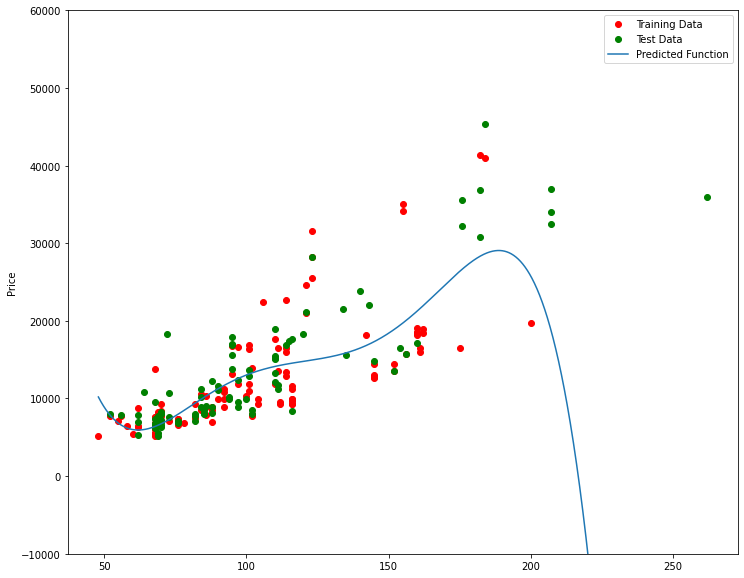

In [75]:
#Graficamos los resultados
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [76]:
#Calculamos el R2 de los datos polinomiales de entrenamiento
poly.score(x_train_pr, y_train)

0.556771690212023

In [77]:
#Calculamos el R2 de los datos polinomiales de testing
poly.score(x_test_pr, y_test)

-29.87134030204415

Se puede observar un R2 negativo, lo que nos habla de overfitting

Text(3, 0.75, 'Maximum R^2 ')

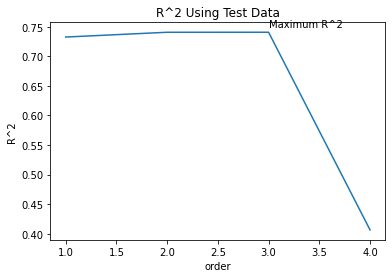

In [78]:
#Vamos a probar los R2 para diferentes modelos polinomiales de diferente grado (1, 2, 3, 4) usando polinomial regression
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')   

In [80]:
#Esta funcion recibe orden polinomial y data. GEnerara un split de la data y una funcion polinomial usando el orden como parametro.
#Finalnente grafica el resultado

def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [81]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<h3>Question 4 a)</h3>
We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.

In [82]:
pr1 = PolynomialFeatures(degree = 2)

<h3>Question 4 b)</h3>
Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".

In [90]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

<h3>Question 4 c)</h3>
How many dimensions does the new feature have? Hint: use the attribute "shape".

In [91]:
x_train_pr1.shape

(110, 15)

<h3>Question 4 d)</h3>
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.

In [92]:
poly1 = LinearRegression()

poly1.fit(x_train_pr1, y_train)

LinearRegression()

<h3>Question 4 e) </h3>
Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


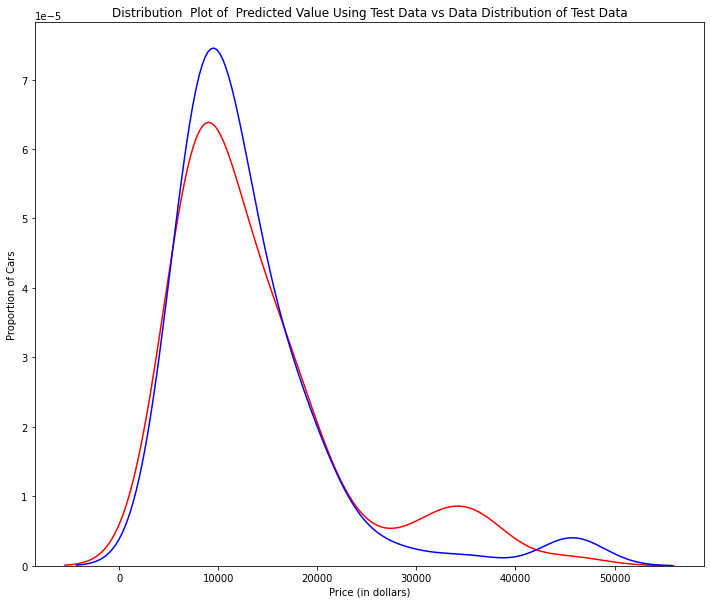

In [96]:
yhat_test1 = poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

<h3>Question 4 f)</h3>
Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.

Se observa que el valor predicho es más alto que el real para aquellos autos cuyo valor es de aproximadamente 10,000 USD. Se observa también que los autos con un valor real de entre 30,000 y 40,000, tienden a predecir un valor de hecho menor. Mientras que los autos cuyo valore real fue arriba de los 40,000 obtuvieron valores mayores

## Ridge Regression

In [97]:
#Creamos una funcion polinomial
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [99]:
#Ahora creamos un modelo ridge con alpha  1
RigeModel=Ridge(alpha=1)

In [100]:
#Hacemos el entrenamiento
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [101]:
#Y ahora obtenemos la predicción
yhat = RigeModel.predict(x_test_pr)

In [102]:
#COmparamos resultados predichos vs reales
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [104]:
#Creamos un arreglo con 1000 iteraciones de alphas diferentes (multiplos de 10)
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:07<00:00, 132.32it/s, Test Score=0.564, Train Score=0.859]


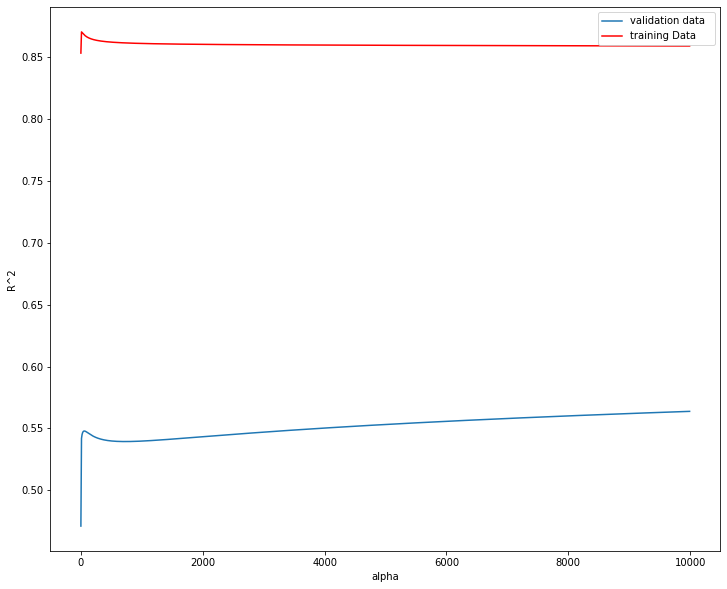

In [105]:
#Y graficamos los diferentes scores de cada alpha
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

<h3>Question 5</h3>
Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

In [108]:
RigeModel = Ridge(alpha = 10) 
RigeModel.fit(x_train_pr, y_train)
test_score= RigeModel.score(x_test_pr, y_test)
test_score

0.5418576440206702

## Grid Search

In [110]:
#Definimos los parámetros del grid
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [111]:
#Creamos el modelo Ridge
RR=Ridge()
RR

Ridge()

In [112]:
#Creamos el objeto grid
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [113]:
#Entrenamos el modelo
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [114]:
#Buscamos el mejor estimador
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [115]:
#Finalmente, obtenemos el score con el mejor estimador
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

# Sección 2: Graded Review Questions


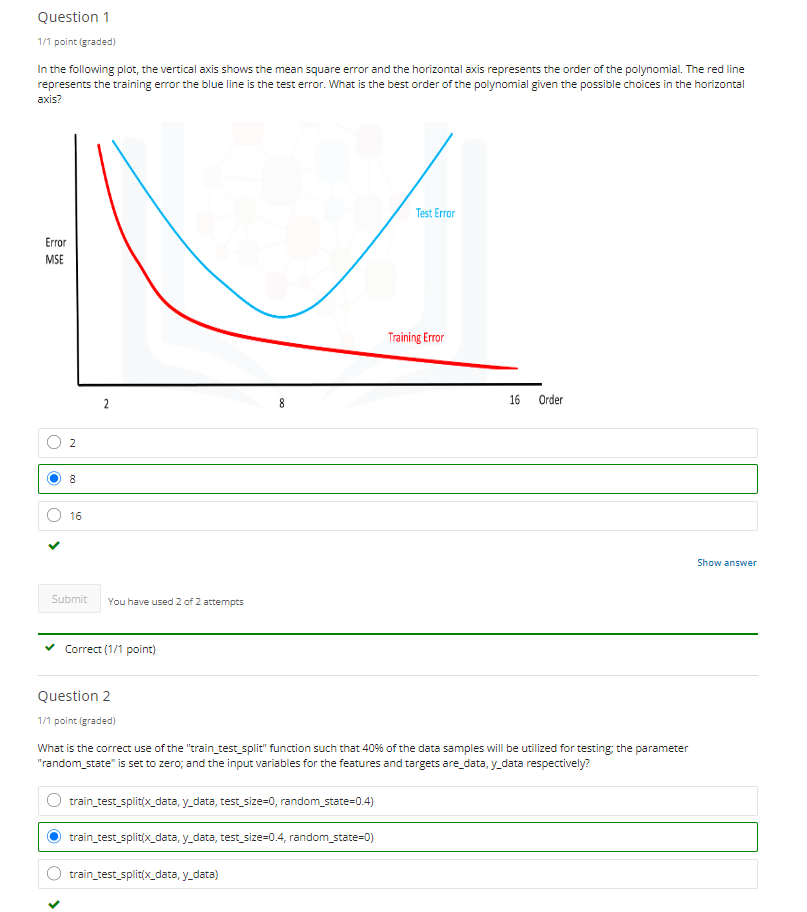

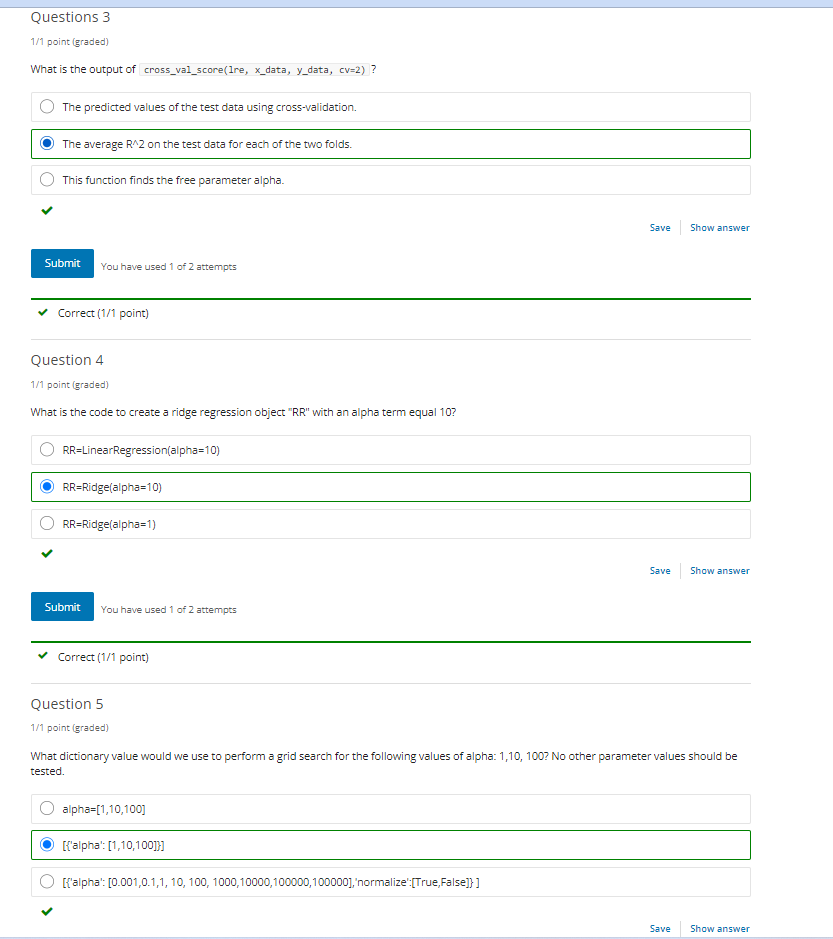

# Sección 3: Evidencia

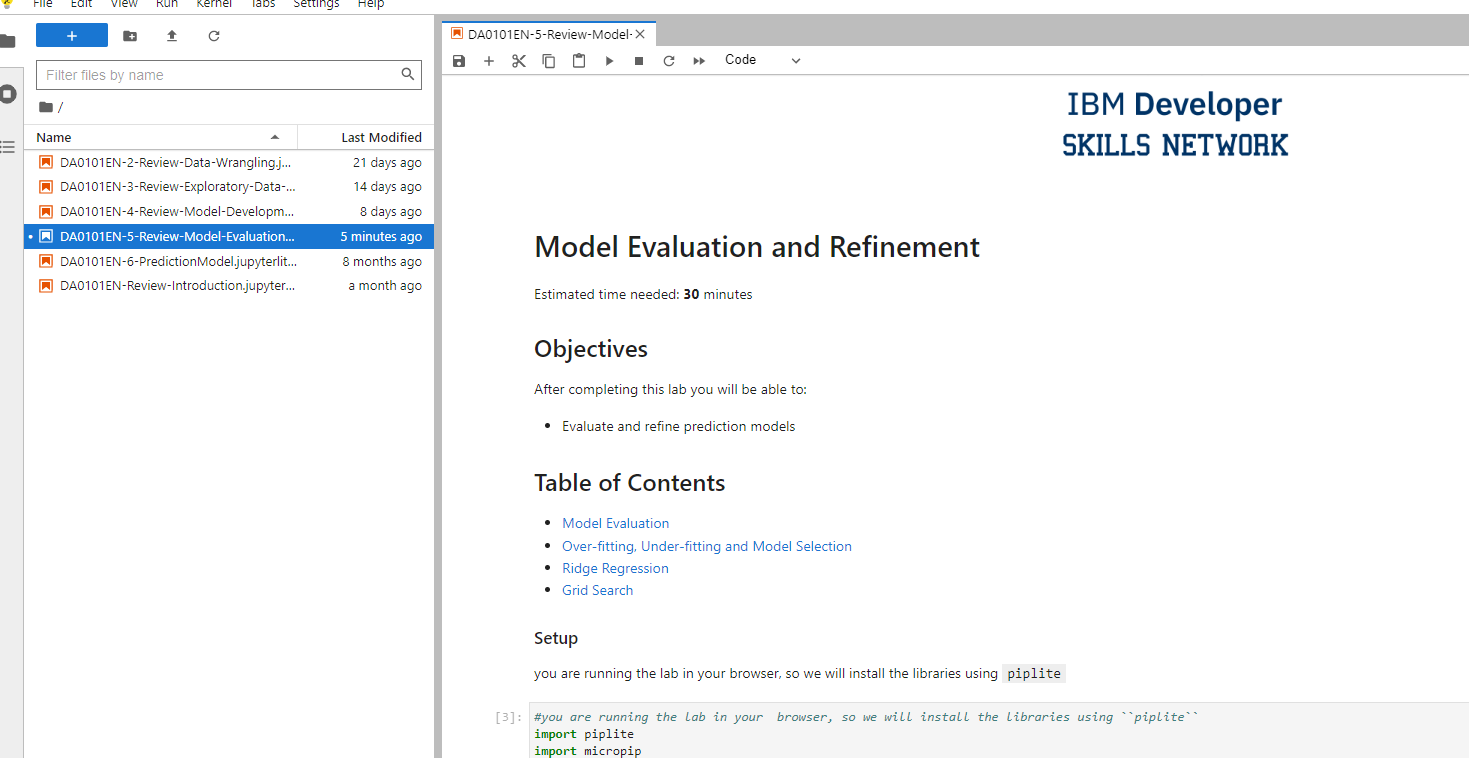